# WP2.2 - Short circuit on three-phase grids with static generators and nominal current

This Notebook shows exemplary tests that are implemented in the sce_test/(TODO: Add file name here) file.

Therefore it must be run in an environment where the pandapower test folders can be found by the jupyter server's python environment. This can be done by checking out the git branche sce in pandapower and locally initializing the repository by using `pip install -e .`.

Further information on running short-circuit calculations in pandapower can be found in the [documentation on shortcircuit](https://pandapower.readthedocs.io/en/latest/shortcircuit/run.html) and the [shortcircuit tutorial](https://github.com/e2nIEE/pandapower/blob/sce/tutorials/shortcircuit/shortcircuit.ipynb).


In [107]:
import os
from pandapower import pp_dir
from pandapower.plotting import simple_plot, create_generic_coordinates, set_line_geodata_from_bus_geodata
from pandapower.test.shortcircuit.sce_tests.test_all_faults_and_cases import load_test_case, load_test_case_data, run_test_cases, compare_results

testfiles_path = os.path.join(pp_dir, 'test', 'shortcircuit', 'sce_tests')

def plot(net):
    create_generic_coordinates(net, overwrite=True)
    set_line_geodata_from_bus_geodata(net, overwrite=True)

    simple_plot(
        net,
        line_width=5.,
        plot_loads=True, plot_gens=True, plot_sgens=True,
        load_size=3., gen_size=3., sgen_size=3., ext_grid_size=1.5
    )

## Test Case 1: Four bus radial grid with static generator

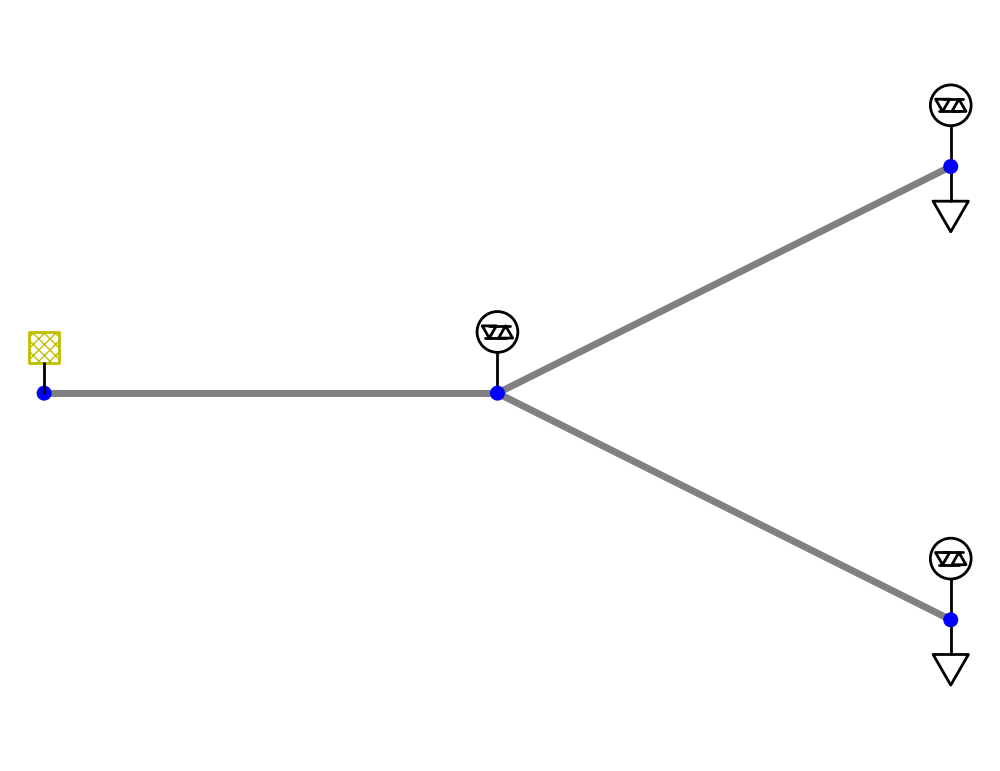

In [108]:
net_name = "1_four_bus_radial_grid_sgen"

fault = "LLL"
case = "max"
fault_values = (0.0, 0.0)
# lv_tol_percents does not influence max case (default value is 10)
lv_tol_percents = 10
fault_location_bus = 0
is_branch_test = True
sgen_idx = 1
# vector group not necesarry as the grid does not contain a transformer

net, dataframes = load_test_case_data(net_name, fault_location_bus, sgen_idx=sgen_idx)

plot(net)

With the network and expected results loaded, we now can run the test to receive the dataframes and the columns that should be compared.

Below is the list of columns that will be compared.

In [109]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['name', 'ikss_ka', 'ikss_a_from_ka', 'ikss_a_from_degree',
       'ikss_a_to_ka', 'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar',
       'p_a_to_mw', 'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree',
       'vm_a_to_pu', 'va_a_to_degree'],
      dtype='object')

In [110]:
net_df[columns_to_check]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.173205,0.173205,95.710593,0.173205,-84.289407,0.0,0.0,0.0468,0.0531,0.000000,0.000000,0.011797,-35.680938
1,Line_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.011797,-35.680938,0.011797,-35.680938
2,Line_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.011797,-35.680938,0.011797,-35.680938


In [111]:
pf_results[columns_to_check]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.173205,0.173205,95.710594,0.173205,-84.289406,-1.000000e-07,-1.000000e-07,0.0468,0.0531,0.000000,0.000000,0.011797,-35.680938
1,Line_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.011797,-35.680938,0.011797,-35.680938
2,Line_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.011797,-35.680938,0.011797,-35.680938


These are all the test results that were exported from PowerFactory. Depending on the parameter combination, the corresponding dataframe is selected.

In [112]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.173205,0.173205,95.710594,0.173205,-84.289406,-1.000000e-07,-1.000000e-07,0.0468,0.0531,0.000000,0.000000,0.011797,-35.680938
1,Line_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.011797,-35.680938,0.011797,-35.680938
2,Line_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.011797,-35.680938,0.011797,-35.680938


As you can see the results are matching and the comparison function will pass and not throw any errors.

In [113]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 2: Five bus radial grid with static generator

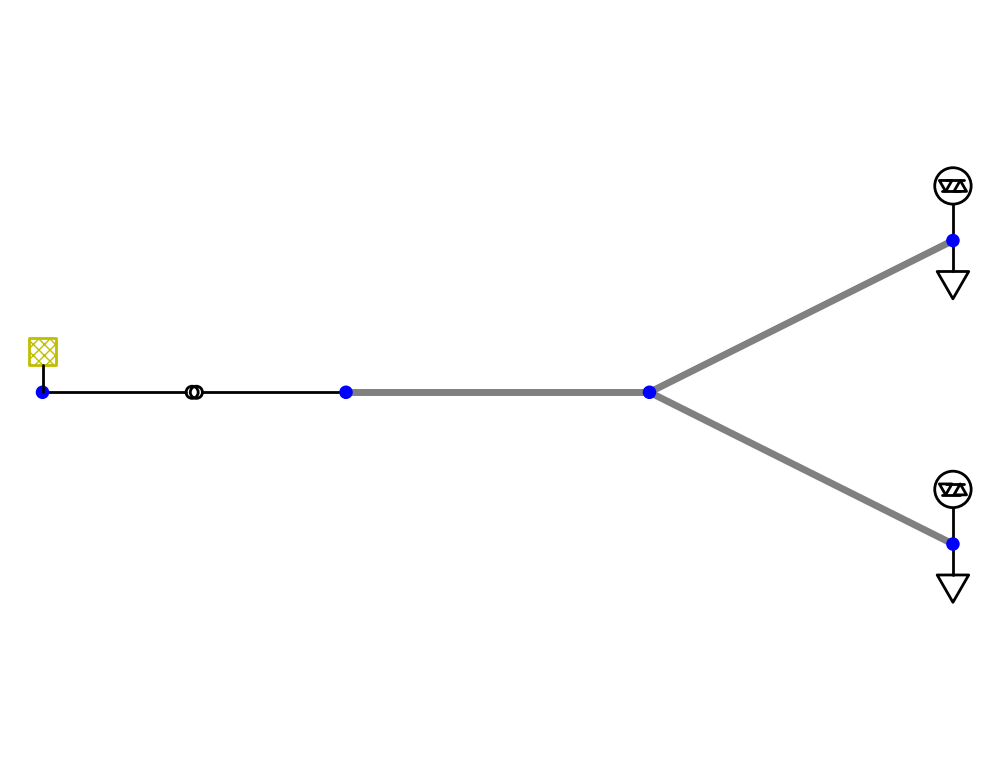

In [114]:
net_name = "2_five_bus_radial_grid"

fault = "LL"
case = "min"
fault_values = (5.0, 5.0)
lv_tol_percents = 6
fault_location_bus = 1
is_branch_test = True
sgen_idx = [3, 4]
vector_group = 'Dyn'

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, sgen_idx=sgen_idx)

plot(net)

In [115]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [116]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.951387e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.625829,122.83634,0.625829,122.83634
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.590277e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.625829,122.83634,0.625829,122.83634
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.951387e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.625829,122.83634,0.625829,122.83634


In [117]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0,0,0,0,-1.006602e-14,-5.306769e-29,8.585725e-15,4.736952e-15,1.0,3.020612e-13,...,0,0,-2.567399e-09,-3.406499e-10,2.567397e-09,3.406476e-10,0.625829,122.836339,0.625829,122.836339
1,0,0,0,0,2.960595e-16,2.368476e-15,-5.921189e-16,2.368476e-15,1.0,3.371330e-13,...,0,0,8.557957e-10,1.135488e-10,-8.557977e-10,-1.135511e-10,0.625829,122.836339,0.625829,122.836339
2,0,0,0,0,-3.256654e-15,7.105427e-15,2.960595e-15,-2.368476e-15,1.0,3.208449e-13,...,0,0,8.557967e-10,1.135473e-10,-8.558033e-10,-1.135534e-10,0.625829,122.836339,0.625829,122.836339


In [118]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,0.346410,0.346410,92.671983,0.346410,-87.328017,-1.000000e-07,-1.000000e-07,0.1872,0.2124,0.00000,0.000000,0.023593,-38.719549
1,Line_1,0.173205,0.173205,-87.328017,0.173205,92.671983,1.403999e-01,1.592999e-01,-0.0936,-0.1062,0.03539,-38.719549,0.023593,-38.719549
2,Line_2,0.173205,0.173205,-87.328017,0.173205,92.671983,1.403999e-01,1.592999e-01,-0.0936,-0.1062,0.03539,-38.719549,0.023593,-38.719549


In [119]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 3: Five bus meshed grid with static generator

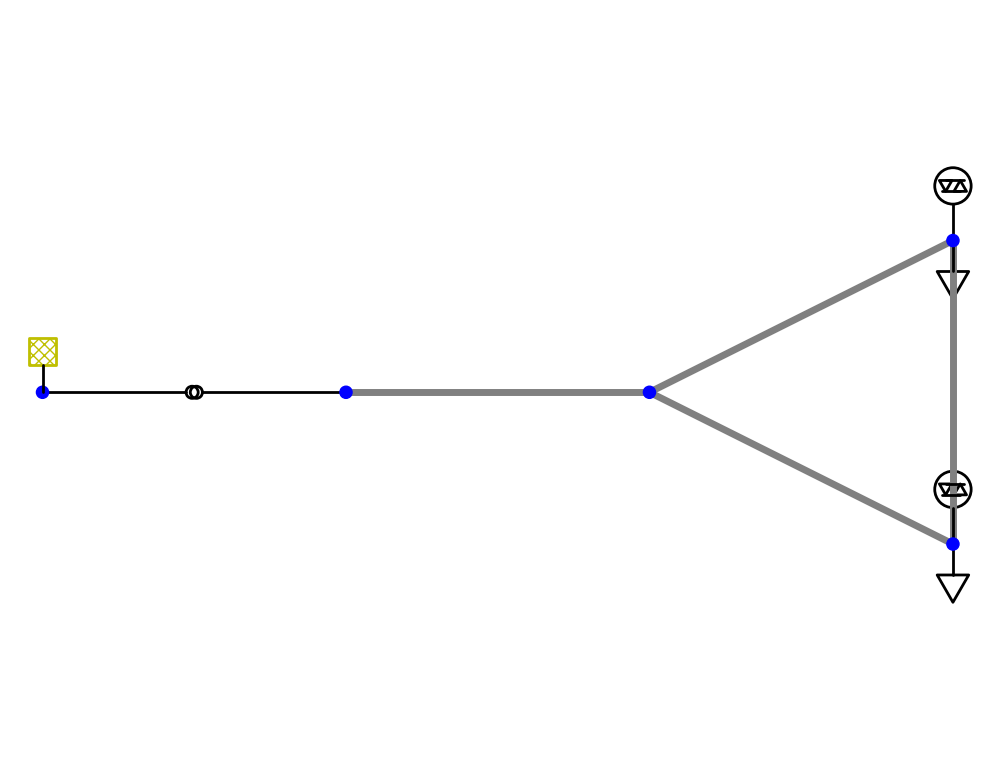

In [120]:
net_name = "3_five_bus_meshed_grid"

fault = "LLG"
case = "min"
fault_values = (5.0, 5.0)
lv_tol_percents = 6
fault_location_bus = 2
is_branch_test = True
sgen_idx = [3, 4]
vector_group = 'Yyn'

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, sgen_idx=sgen_idx)

plot(net)

In [121]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [122]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.008276,96.659393,0.006244,-84.333217,-0.006446,-0.131481,0.006706,0.100331,1.377519,3.852453,...,1.055042,-135.722747,6.935191,6.746436,-5.570753,-5.519273,0.793322,88.577754,0.643699,89.011292
1,0.001041,-84.391311,0.003122,95.666783,0.001116,0.016730,-0.003353,-0.050165,1.394943,1.791428,...,0.003122,95.666783,-0.007670,0.000892,0.023050,-0.002690,0.642459,88.974707,0.643699,89.011292
2,0.001041,-84.391311,0.003122,95.666783,0.001116,0.016730,-0.003353,-0.050165,1.394943,1.791428,...,0.003122,95.666783,-0.007670,0.000892,0.023050,-0.002690,0.642459,88.974707,0.643699,89.011292
3,0.001041,95.608689,0.001041,95.608689,-0.001116,-0.016730,-0.001116,-0.016730,1.394943,1.791428,...,0.001041,95.608689,0.007670,-0.000892,0.007670,-0.000892,0.642459,88.974707,0.642459,88.974707


In [123]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.008276,96.659390,0.006244,-84.333220,-0.006446,-0.131481,0.006706,0.100331,1.377519,3.852453,...,1.055042,-135.722746,6.935191,6.746436,-5.570753,-5.519273,0.793322,88.577755,0.643699,89.011293
1,0.001041,-84.391318,0.003122,95.666781,0.001116,0.016730,-0.003353,-0.050165,1.394943,1.791428,...,0.003122,95.666780,-0.007670,0.000892,0.023050,-0.002690,0.642459,88.974707,0.643699,89.011293
2,0.001041,-84.391318,0.003122,95.666781,0.001116,0.016730,-0.003353,-0.050165,1.394943,1.791428,...,0.003122,95.666780,-0.007670,0.000892,0.023050,-0.002690,0.642459,88.974707,0.643699,89.011293
3,0.001041,95.608689,0.001041,95.608689,-0.001116,-0.016730,-0.001116,-0.016730,1.394943,1.791428,...,0.001041,95.608689,0.007670,-0.000892,0.007670,-0.000892,0.642459,88.974707,0.642459,88.974707


In [124]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line_0,4.282963,4.282963,-77.779846,4.282963,102.220154,28.61628,32.468471,-1.000000e-07,-1.000000e-07,0.291706,-29.171377,0.000000,0.000000
1,Line_1,0.173205,0.173205,-77.779846,0.173205,102.220154,0.04680,0.053100,-1.000000e-07,-1.000000e-07,0.011797,-29.171377,0.000000,0.000000
2,Line_2,0.173205,0.173205,-77.779846,0.173205,102.220154,0.04680,0.053100,-1.000000e-07,-1.000000e-07,0.011797,-29.171377,0.000000,0.000000
3,Line_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.011797,-29.171377,0.011797,-29.171377


In [125]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 4: Twenty bus radial grid with static generator

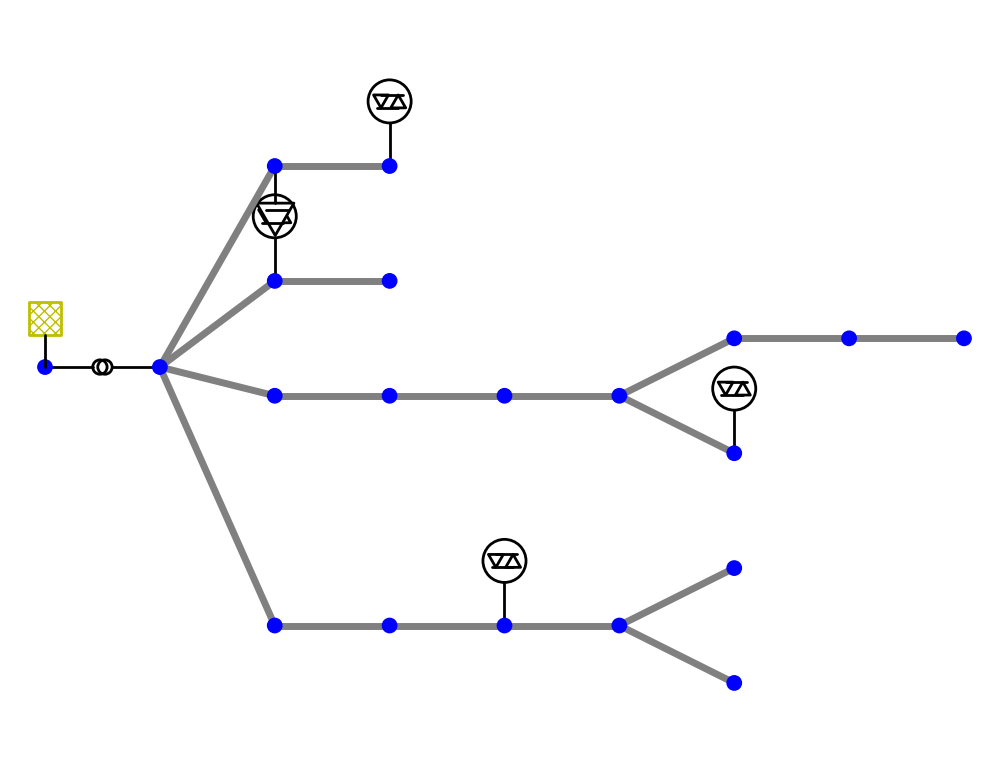

In [126]:
net_name = "4_twenty_bus_radial_grid"

fault = "LG"
case = "max"
fault_values = (0.0, 0.0)
lv_tol_percents = 10
fault_location_bus = 8
is_branch_test = True
sgen_idx = [4, 7, 14, 19]
vector_group = "YNyn"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, sgen_idx=sgen_idx)

plot(net)

In [127]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes["branch" if is_branch_test else "bus"], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [128]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,2.833907,-67.333206,2.833907,112.666794,0.269442,0.538619,-0.203388,-0.406378,0.920227,-3.909552,...,0.173205,50.807010,-0.018588,-0.043159,0.020006,0.042173,1.174787,117.506550,1.166935,115.427978
10,0.173205,94.786906,0.173205,-85.213094,-0.006166,-0.037586,0.006466,0.038186,0.952205,-4.528824,...,0.173205,34.786906,-0.006555,-0.047813,0.006855,0.048413,1.206497,116.980487,1.222389,116.727701
11,0.173205,94.786906,0.173205,-85.213094,-0.006466,-0.038186,0.006766,0.038786,0.968234,-4.823103,...,0.173205,34.786906,-0.006855,-0.048413,0.007155,0.049013,1.222389,116.727701,1.238303,116.481409
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.984288,-5.107790,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.238303,116.481409,1.238303,116.481409
13,0.173205,94.786906,0.173205,-85.213094,-0.006766,-0.038786,0.007066,0.039386,0.984288,-5.107790,...,0.173205,34.786906,-0.007155,-0.049013,0.007455,0.049613,1.238303,116.481409,1.254240,116.241370
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.984288,-5.107790,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.238303,116.481409,1.238303,116.481409
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.984288,-5.107790,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.238303,116.481409,1.238303,116.481409
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.936202,-4.224476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.190630,117.240016,1.190630,117.240016
17,0.173205,94.786906,0.173205,-85.213094,-0.005866,-0.036986,0.006166,0.037586,0.936202,-4.224476,...,0.173205,34.786906,-0.006255,-0.047213,0.006555,0.047813,1.190630,117.240016,1.206497,116.980487
1,0.173205,94.786906,0.173205,-85.213094,-0.005566,-0.036386,0.005866,0.036986,0.920227,-3.909552,...,0.173205,34.786906,-0.005955,-0.046613,0.006255,0.047213,1.174787,117.506550,1.190630,117.240016


In [129]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,2.833907,-67.333204,2.833907,112.666796,2.694424e-01,5.386193e-01,-2.033879e-01,-4.063776e-01,0.920227,-3.909550,...,0.173205,50.807087,-1.858767e-02,-4.315895e-02,2.000619e-02,4.217261e-02,1.174787,117.506550,1.166935,115.427979
1,0.173205,94.786947,0.173205,-85.213053,-6.165540e-03,-3.758585e-02,6.465540e-03,3.818585e-02,0.952205,-4.528820,...,0.173205,34.786936,-6.554997e-03,-4.781259e-02,6.854992e-03,4.841259e-02,1.206497,116.980488,1.222388,116.727703
2,0.173205,94.786946,0.173205,-85.213054,-6.465539e-03,-3.818585e-02,6.765540e-03,3.878585e-02,0.968234,-4.823098,...,0.173205,34.786931,-6.854992e-03,-4.841259e-02,7.154987e-03,4.901259e-02,1.222388,116.727703,1.238303,116.481410
3,0.000000,0.000000,0.000000,0.000000,7.382424e-10,1.399387e-08,-9.031549e-11,-9.682691e-09,0.984288,-5.107785,...,0.000000,0.000000,-1.322916e-08,-5.520680e-09,8.182065e-09,3.373930e-09,1.238303,116.481410,1.238303,116.481410
4,0.173205,94.786943,0.173205,-85.213057,-6.765540e-03,-3.878587e-02,7.065541e-03,3.938587e-02,0.984288,-5.107785,...,0.173205,34.786912,-7.154974e-03,-4.901258e-02,7.454969e-03,4.961258e-02,1.238303,116.481410,1.254240,116.241372
5,0.000000,0.000000,0.000000,0.000000,4.921615e-10,9.329247e-09,1.557652e-10,-5.018068e-09,0.984288,-5.107785,...,0.000000,0.000000,-8.819438e-09,-3.680453e-09,3.772346e-09,1.533703e-09,1.238303,116.481410,1.238303,116.481410
6,0.000000,0.000000,0.000000,0.000000,2.460809e-10,4.664624e-09,4.018461e-10,-3.534443e-10,0.984288,-5.107785,...,0.000000,0.000000,-4.409719e-09,-1.840227e-09,-6.373732e-10,-3.065236e-10,1.238303,116.481410,1.238303,116.481410
7,0.000000,0.000000,0.000000,0.000000,9.702455e-13,4.387733e-09,5.520161e-10,-2.781572e-10,0.936202,-4.224473,...,0.000000,0.000000,-4.423801e-09,-1.896932e-09,-4.012262e-10,-2.312367e-10,1.190629,117.240016,1.190629,117.240016
8,0.173205,94.786941,0.173205,-85.213059,-5.865540e-03,-3.698587e-02,6.165540e-03,3.758587e-02,0.936202,-4.224473,...,0.173205,34.786911,-6.254975e-03,-4.721259e-02,6.554970e-03,4.781258e-02,1.190629,117.240016,1.206497,116.980488
9,0.173205,94.786949,0.173205,-85.213051,-5.565540e-03,-3.638584e-02,5.865540e-03,3.698584e-02,0.920227,-3.909550,...,0.173205,34.786946,-5.955006e-03,-4.661260e-02,6.255001e-03,4.721260e-02,1.174787,117.506550,1.190629,117.240017


In [130]:
dataframes['branch']["LLL_max_10"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,vm_a_to_pu,va_a_to_degree
0,Line0_1_2,2.337425,2.337425,-67.965255,2.337425,112.034745,6.682898e-01,1.335278e+00,-5.043832e-01,-1.007465e+00,0.922047,-4.552636,0.695727,-4.559900
1,Line10_11_12,0.173205,0.173205,94.786916,0.173205,-85.213084,-1.975613e-02,-1.127789e-01,2.065613e-02,1.145789e-01,0.954136,-5.149099,0.970217,-5.432520
2,Line11_12_13,0.173205,0.173205,94.786915,0.173205,-85.213085,-2.065612e-02,-1.145789e-01,2.155612e-02,1.163789e-01,0.970217,-5.432520,0.986321,-5.706692
3,Line12_13_15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.986321,-5.706692,0.986321,-5.706692
4,Line13_13_14,0.173205,0.173205,94.786913,0.173205,-85.213087,-2.155612e-02,-1.163789e-01,2.245612e-02,1.181789e-01,0.986321,-5.706692,1.002446,-5.972050
5,Line14_15_16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.986321,-5.706692,0.986321,-5.706692
6,Line15_16_17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.986321,-5.706692,0.986321,-5.706692
7,Line16_4_18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.938079,-4.855968,0.938079,-4.855968
8,Line17_5_19,0.173205,0.173205,94.786911,0.173205,-85.213089,-1.885612e-02,-1.109789e-01,1.975612e-02,1.127789e-01,0.938079,-4.855968,0.954136,-5.149099
9,Line1_1_3,0.173205,0.173205,94.786918,0.173205,-85.213082,-1.795613e-02,-1.091789e-01,1.885613e-02,1.109789e-01,0.922047,-4.552636,0.938079,-4.855968


In [131]:
compare_results(columns_to_check, net_df, pf_results)